## Libraries

In [1]:
import pandas as pd
pd.options.display.max_columns = 50

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loop progress
from tqdm.notebook import tqdm
tqdm.pandas(desc="apply progress")


#own timeseries helper functions
from timeseries_functions import post_applier

C:\Users\henri\anaconda3\envs\goodreadsproject\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## Load data

a) load raw csv

In [3]:
df = pd.read_csv('preprocessed_data.csv', index_col = 0)
df_original = df.copy()
df.publish_date = pd.to_datetime(df.publish_date)

df.head()

,url,title,author,num_ratings,num_reviews,avg_rating,num_pages,language,publish_date,genres,series,rating_histogram,awards,age,Fiction,Contemporary,Romance,Mystery,Young Adult,Fantasy,Audiobook,Thriller,Adult,Historical,Historical Fiction,Nonfiction,Mystery Thriller,Contemporary Romance,Suspense,Adult Fiction,Science Fiction,Crime,Womens Fiction,LGBT,Chick Lit,Cultural,Autobiography,Paranormal,Memoir,Literary Fiction,New Adult,War,Biography,Magic,has_award,is_series
0,https://www.goodreads.com/book/show/38260251-t...,Tangled Like Us,Krista Ritchie,3506,510,4.08,484.0,English,2019-01-17,"['New Adult', 'Romance', 'Contemporary Romance...",Like Us #4,"{'5': 1483, '4': 1164, '3': 611, '2': 159, '1'...",NaN,499.0,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
1,https://www.goodreads.com/book/show/44094817-t...,The Castle Mystery,Joyce Cato,2567,153,4.28,219.0,English,2019-02-27,"['Cozy Mystery', 'Mystery', 'Crime']",Jenny Starling #4,"{'5': 1250, '4': 878, '3': 365, '2': 59, '1': 15}",NaN,458.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,https://www.goodreads.com/book/show/36300682-w...,When You Read This,Mary Adkins,3079,633,3.58,400.0,NaN,2019-02-05,"['Chick Lit', 'Fiction', 'Contemporary', 'Wome...",NaN,"{'5': 434, '4': 1267, '3': 1082, '2': 257, '1'...",NaN,480.0,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
3,https://www.goodreads.com/book/show/50212494-t...,The Flatshare,Beth O'Leary,71110,10764,4.13,336.0,English,2019-04-10,"['Audiobook', 'Chick Lit', 'Fiction', 'Romance...",NaN,"{'5': 26969, '4': 29723, '3': 11643, '2': 2121...",['Goodreads Choice Award Nominee for Romance (...,416.0,True,True,True,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False
4,https://www.goodreads.com/book/show/46006080-t...,Too Many,Alexa Riley,2852,268,3.77,71.0,NaN,2019-05-23,"['Romance', 'Menage', 'M F M', 'Erotica', 'Adu...",Too Series #2,"{'5': 957, '4': 772, '3': 737, '2': 275, '1': ...",NaN,373.0,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [4]:
df.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3218 entries, 0 to 4241
Data columns (total 46 columns):
 #   Column                Dtype         
---  ------                -----         
 0   url                   object        
 1   title                 object        
 2   author                object        
 3   num_ratings           int64         
 4   num_reviews           int64         
 5   avg_rating            float64       
 6   num_pages             float64       
 7   language              object        
 8   publish_date          datetime64[ns]
 9   genres                object        
 10  series                object        
 11  rating_histogram      object        
 12  awards                object        
 13  age                   float64       
 14  Fiction               bool          
 15  Contemporary          bool          
 16  Romance               bool          
 17  Mystery               bool          
 18  Young Adult           bool          
 19  Fantas

b) load presaved dataset

In [4]:
df_revs = pd.read_csv('df_revs.csv', index_col=0)

C:\Users\henri\anaconda3\envs\goodreadsproject\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [7]:
df_revs['post_date'] = pd.to_datetime(df_revs['post_date'])

## Constructing df_revs

#### clone observations based on num_reviews

In [21]:
df_revs = df.loc[df.index.repeat(df.num_reviews)].reset_index(drop = True)

rev_chars = ['url', 'avg_rating']
book_chars = [\
              'title', 'author', 'num_ratings', 'num_reviews',
              'num_pages', 'publish_date', 'age',
              'has_award', 'is_series',
              'Fiction', 'Contemporary',
              'Romance', 'Mystery', 'Young Adult', 'Fantasy', 
              'Audiobook', 'Thriller', 'Adult', 'Historical', 
              'Historical Fiction', 'Nonfiction', 'Mystery Thriller', 
              'Contemporary Romance', 'Suspense', 'Adult Fiction',
              'Science Fiction', 'Crime', 'Womens Fiction', 'LGBT', 
              'Chick Lit', 'Cultural', 'Autobiography', 'Paranormal', 
              'Memoir', 'Literary Fiction', 'New Adult', 'War', 
              'Biography', 'Magic']

df_revs = df_revs[~ df_revs.age.isnull()]

df_revs = df_revs[rev_chars + book_chars]

In [22]:
df_revs

,url,avg_rating,title,author,num_ratings,num_reviews,num_pages,publish_date,age,has_award,is_series,Fiction,Contemporary,Romance,Mystery,Young Adult,Fantasy,Audiobook,Thriller,Adult,Historical,Historical Fiction,Nonfiction,Mystery Thriller,Contemporary Romance,Suspense,Adult Fiction,Science Fiction,Crime,Womens Fiction,LGBT,Chick Lit,Cultural,Autobiography,Paranormal,Memoir,Literary Fiction,New Adult,War,Biography,Magic
0,https://www.goodreads.com/book/show/38260251-t...,4.08,Tangled Like Us,Krista Ritchie,3506,510,484.0,2019-01-17,499.0,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,https://www.goodreads.com/book/show/38260251-t...,4.08,Tangled Like Us,Krista Ritchie,3506,510,484.0,2019-01-17,499.0,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,https://www.goodreads.com/book/show/38260251-t...,4.08,Tangled Like Us,Krista Ritchie,3506,510,484.0,2019-01-17,499.0,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,https://www.goodreads.com/book/show/38260251-t...,4.08,Tangled Like Us,Krista Ritchie,3506,510,484.0,2019-01-17,499.0,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,https://www.goodreads.com/book/show/38260251-t...,4.08,Tangled Like Us,Krista Ritchie,3506,510,484.0,2019-01-17,499.0,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5543475,https://www.goodreads.com/book/show/48761584-c...,4.03,Chosen By A Beast,Miranda Bridges,1318,105,156.0,2019-12-16,166.0,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
5543476,https://www.goodreads.com/book/show/48761584-c...,4.03,Chosen By A Beast,Miranda Bridges,1318,105,156.0,2019-12-16,166.0,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
5543477,https://www.goodreads.com/book/show/48761584-c...,4.03,Chosen By A Beast,Miranda Bridges,1318,105,156.0,2019-12-16,166.0,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
5543478,https://www.goodreads.com/book/show/48761584-c...,4.03,Chosen By A Beast,Miranda Bridges,1318,105,156.0,2019-12-16,166.0,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False


In [23]:
df_revs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5180752 entries, 0 to 5543479
Data columns (total 41 columns):
 #   Column                Dtype         
---  ------                -----         
 0   url                   object        
 1   avg_rating            float64       
 2   title                 object        
 3   author                object        
 4   num_ratings           int64         
 5   num_reviews           int64         
 6   num_pages             float64       
 7   publish_date          datetime64[ns]
 8   age                   float64       
 9   has_award             bool          
 10  is_series             bool          
 11  Fiction               bool          
 12  Contemporary          bool          
 13  Romance               bool          
 14  Mystery               bool          
 15  Young Adult           bool          
 16  Fantasy               bool          
 17  Audiobook             bool          
 18  Thriller              bool          
 19  

In [24]:
df.num_reviews.sum()

5543494

In [26]:
df_revs.isnull().sum()

url                         0
avg_rating                  0
title                       0
author                      0
num_ratings                 0
num_reviews                 0
num_pages               36451
publish_date                0
age                         0
has_award                   0
is_series                   0
Fiction                     0
Contemporary                0
Romance                     0
Mystery                     0
Young Adult                 0
Fantasy                     0
Audiobook                   0
Thriller                    0
Adult                       0
Historical                  0
Historical Fiction          0
Nonfiction                  0
Mystery Thriller            0
Contemporary Romance        0
Suspense                    0
Adult Fiction               0
Science Fiction             0
Crime                       0
Womens Fiction              0
LGBT                        0
Chick Lit                   0
Cultural                    0
Autobiogra

#### assign post_date

In [34]:
df_revs['post_date'] = df_revs.progress_apply(post_applier, axis = 1)


df_revs

,url,avg_rating,title,author,num_ratings,num_reviews,num_pages,publish_date,age,has_award,is_series,Fiction,Contemporary,Romance,Mystery,Young Adult,Fantasy,Audiobook,Thriller,Adult,Historical,Historical Fiction,Nonfiction,Mystery Thriller,Contemporary Romance,Suspense,Adult Fiction,Science Fiction,Crime,Womens Fiction,LGBT,Chick Lit,Cultural,Autobiography,Paranormal,Memoir,Literary Fiction,New Adult,War,Biography,Magic,post_date
0,https://www.goodreads.com/book/show/38260251-t...,4.08,Tangled Like Us,Krista Ritchie,3506,510,484.0,2019-01-17,499.0,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,2019-02-28
1,https://www.goodreads.com/book/show/38260251-t...,4.08,Tangled Like Us,Krista Ritchie,3506,510,484.0,2019-01-17,499.0,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,2020-03-05
2,https://www.goodreads.com/book/show/38260251-t...,4.08,Tangled Like Us,Krista Ritchie,3506,510,484.0,2019-01-17,499.0,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,2020-03-19
3,https://www.goodreads.com/book/show/38260251-t...,4.08,Tangled Like Us,Krista Ritchie,3506,510,484.0,2019-01-17,499.0,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,2020-01-09
4,https://www.goodreads.com/book/show/38260251-t...,4.08,Tangled Like Us,Krista Ritchie,3506,510,484.0,2019-01-17,499.0,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,2019-09-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5543475,https://www.goodreads.com/book/show/48761584-c...,4.03,Chosen By A Beast,Miranda Bridges,1318,105,156.0,2019-12-16,166.0,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,2020-05-27
5543476,https://www.goodreads.com/book/show/48761584-c...,4.03,Chosen By A Beast,Miranda Bridges,1318,105,156.0,2019-12-16,166.0,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,2020-03-19
5543477,https://www.goodreads.com/book/show/48761584-c...,4.03,Chosen By A Beast,Miranda Bridges,1318,105,156.0,2019-12-16,166.0,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,2020-02-24
5543478,https://www.goodreads.com/book/show/48761584-c...,4.03,Chosen By A Beast,Miranda Bridges,1318,105,156.0,2019-12-16,166.0,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,2020-03-30


In [39]:
df_revs.to_csv('df_revs.csv')

## EDA

### number of reviews

In [63]:
df_revs.set_index('post_date', inplace = True)

df_revs.head()

,url,avg_rating,title,author,num_ratings,num_reviews,num_pages,publish_date,age,has_award,is_series,Fiction,Contemporary,Romance,Mystery,Young Adult,Fantasy,Audiobook,Thriller,Adult,Historical,Historical Fiction,Nonfiction,Mystery Thriller,Contemporary Romance,Suspense,Adult Fiction,Science Fiction,Crime,Womens Fiction,LGBT,Chick Lit,Cultural,Autobiography,Paranormal,Memoir,Literary Fiction,New Adult,War,Biography,Magic
post_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-02-28,https://www.goodreads.com/book/show/38260251-t...,4.08,Tangled Like Us,Krista Ritchie,3506,510,484.0,2019-01-17,499.0,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2020-03-05,https://www.goodreads.com/book/show/38260251-t...,4.08,Tangled Like Us,Krista Ritchie,3506,510,484.0,2019-01-17,499.0,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2020-03-19,https://www.goodreads.com/book/show/38260251-t...,4.08,Tangled Like Us,Krista Ritchie,3506,510,484.0,2019-01-17,499.0,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2020-01-09,https://www.goodreads.com/book/show/38260251-t...,4.08,Tangled Like Us,Krista Ritchie,3506,510,484.0,2019-01-17,499.0,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2019-09-04,https://www.goodreads.com/book/show/38260251-t...,4.08,Tangled Like Us,Krista Ritchie,3506,510,484.0,2019-01-17,499.0,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [213]:
genres_all = ['Fiction',
       'Contemporary', 'Romance', 'Mystery', 'Young Adult', 'Fantasy',
       'Audiobook', 'Thriller', 'Adult', 'Historical', 'Historical Fiction',
       'Nonfiction', 'Mystery Thriller', 'Contemporary Romance', 'Suspense',
       'Adult Fiction', 'Science Fiction', 'Crime', 'Womens Fiction', 'LGBT',
       'Chick Lit', 'Cultural', 'Autobiography', 'Paranormal', 'Memoir',
       'Literary Fiction', 'New Adult', 'War', 'Biography', 'Magic']

n = 15
genres = random.sample(genres, n)

In [227]:
def logsum(x):
    tvar = np.sum(x)
    tvar = np.log(tvar+.01)
    return tvar

def genre_statter(data, genres, aggfunc):
    if type(genres) == list:
        idx = data.groupby([data.index.year, data.index.week]).agg({genres[0] : aggfunc}).index
        idx.names = ['year', 'week']
        concat_df= pd.DataFrame([], index = idx)
        
        for genre in tqdm(genres):
            tdf = data.groupby(by = [data.index.year, data.index.week]).agg({genre : aggfunc})
            concat_df = pd.concat([concat_df, tdf], axis = 1)
            
    else:
        genre = genres
        concat_df = data.groupby(by = [data.index.year, data.index.week]).agg({genre : aggfunc})
    
    return concat_df

def vdf_plotter(viz_dataframe, form = 'wide', **kwargs):
    fgs = kwargs.get('figsize', (8, 6))
    fig, ax = plt.subplots(figsize = fgs)
    
    if form == 'wide':
        viz_dataframe.plot(figsize = fgs, ax = ax)
    elif form == 'long':
        #get the plot variables
        x = kwargs.get('x', None)
        y = kwargs.get('y', None)
        hue = kwargs.get('hue', None)
        
        #plot the data
        sns.lineplot(x, y, hue = hue, ax= ax)
    
    else:
        return 'specify the format to be either "wide" or "long"'        

    #set options for the legend box:
    ## Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])

    ## Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5)
    return ax

In [221]:
vdf_numrevs = genre_statter(df_revs, genres_all, np.sum)
vdf_numrevs

Fiction  Contemporary  Romance  Mystery  Young Adult  Fantasy  \
year week                                                                   
2019 1      22331.0        9186.0   9666.0   7396.0       8007.0   7193.0   
     2       1670.0         534.0   1097.0    621.0        640.0   1002.0   
     3       2553.0        1043.0   1446.0    820.0       1224.0   1320.0   
     4       2799.0        1272.0   1620.0    960.0       1339.0   1348.0   
     5       3913.0        1651.0   2244.0   1166.0       2088.0   1978.0   
...             ...           ...      ...      ...          ...      ...   
2020 18    147256.0       65149.0  51019.0  54560.0      38436.0  40480.0   
     19    152935.0       69550.0  55645.0  55802.0      43059.0  44505.0   
     20    161302.0       71709.0  58703.0  61307.0      45778.0  45740.0   
     21    168778.0       74482.0  62025.0  62973.0      49067.0  49006.0   
     22    145639.0       64648.0  53487.0  54625.0      42257.0  42192.0   

           Audiobook  Thriller     Adult  Historical  Historical Fiction  \
year week                                                                  
2019 1       11645.0    5423.0   14371.0      5138.0              4990.0   
     2         559.0     610.0     853.0       280.0               258.0   
     3         680.0     813.0    1478.0       434.0               409.0   
     4         739.0     890.0    1637.0       420.0               397.0   
     5        1234.0    1058.0    2537.0       712.0               690.0   
...              ...       ...       ...         ...                 ...   
2020 18      84912.0   45306.0   97828.0     33794.0             32839.0   
     19      87421.0   46323.0  103699.0     34288.0             33424.0   
     20      92683.0   51469.0  106825.0     34828.0             33945.0   
     21      97470.0   53159.0  112229.0     35197.0             34281.0   
     22      84435.0   46042.0   96715.0     30297.0             29490.0   

           Nonfiction  Mystery Thriller  Contemporary Romance  Suspense  \
year week                                                                 
2019 1         2439.0            3739.0                1919.0    1951.0   
     2          140.0             327.0                 168.0     322.0   
     3          227.0             492.0                 244.0     390.0   
     4          302.0             562.0                 294.0     417.0   
     5          390.0             663.0                 467.0     504.0   
...               ...               ...                   ...       ...   
2020 18       12146.0           31918.0               12437.0   23146.0   
     19       12154.0           32877.0               13052.0   23779.0   
     20       12223.0           37916.0               14220.0   24158.0   
     21       12469.0           39420.0               16357.0   23800.0   
     22       10733.0           34337.0               14357.0   20780.0   

           Adult Fiction  Science Fiction    Crime  Womens Fiction    LGBT  \
year week                                                                    
2019 1            3986.0           4376.0   2326.0          2096.0  1994.0   
     2              59.0            247.0    226.0            74.0    40.0   
     3              67.0            368.0    237.0            81.0    82.0   
     4              79.0            385.0    268.0            97.0    79.0   
     5             178.0            402.0    334.0           189.0   138.0   
...                  ...              ...      ...             ...     ...   
2020 18          40107.0          26690.0  21480.0         11819.0  8736.0   
     19          40610.0          27185.0  21496.0         12432.0  8859.0   
     20          40931.0          27077.0  21744.0         12935.0  9137.0   
     21          42214.0          30066.0  21657.0         15122.0  9414.0   
     22          36649.0          25707.0  19019.0         13381.0  8005.0   

           Chick Lit  Cultural

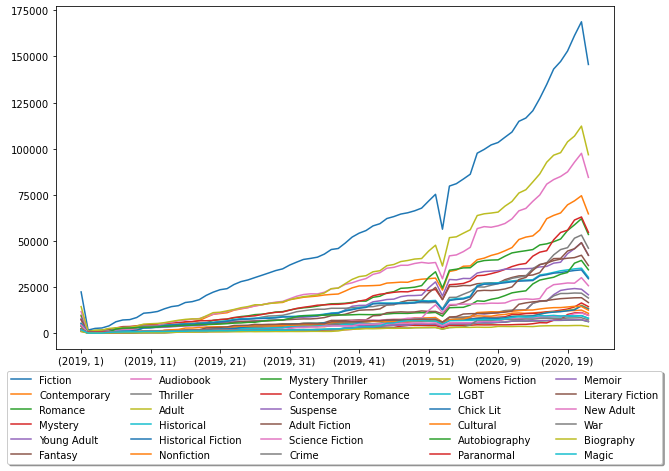

In [229]:
vdf_plotter(vdf_numrevs, form = 'wide', figsize = (10, 7))

on a log scale:

In [230]:
vdf_numrevs = genre_statter(df_revs, genres_all, logsum)
vdf_numrevs

Fiction  Contemporary    Romance    Mystery  Young Adult  \
year week                                                               
2019 1     10.013732      9.125437   9.176371   8.908696     8.988073   
     2      7.420585      6.280415   7.000344   6.431347     6.461484   
     3      7.845028      6.949866   7.276563   6.709317     7.109888   
     4      7.937021      7.148354   7.390188   6.866944     7.199686   
     5      8.272062      7.409143   7.716020   7.061343     7.643967   
...              ...           ...        ...        ...          ...   
2020 18    11.899928     11.084432  10.839954  10.907056    10.556750   
     19    11.937768     11.149801  10.926748  10.929565    10.670327   
     20    11.991034     11.180372  10.980246  11.023649    10.731559   
     21    12.036340     11.218313  11.035293  11.050462    10.800942   
     22    11.888886     11.076713  10.887194  10.908247    10.651526   

             Fantasy  Audiobook   Thriller      Adult  Historical  \
year week                                                           
2019 1      8.880865   9.362633   8.598406   9.572968    8.544421   
     2      6.909763   6.326167   6.413475   6.748771    5.634825   
     3      7.185395   6.522108   6.700743   7.298452    6.073068   
     4      7.206385   6.605311   6.791233   7.400627    6.040279   
     5      7.589847   7.118024   6.964145   7.838742    6.568092   
...              ...        ...        ...        ...         ...   
2020 18    10.608564  11.349371  10.721195  11.490966   10.428039   
     19    10.703357  11.378491  10.743394  11.549248   10.442551   
     20    10.730729  11.436940  10.848735  11.578947   10.458177   
     21    10.799698  11.487300  10.881043  11.628297   10.468716   
     22    10.649986  11.343737  10.737310  11.479524   10.318804   

           Historical Fiction  Nonfiction  Mystery Thriller  \
year week                                                     
2019 1               8.515193    7.799347          8.226576   
     2               5.552998    4.941714          5.789991   
     3               6.013740    5.424994          6.198499   
     4               5.983961    5.710460          6.331520   
     5               6.536706    5.966172          6.496790   
...                       ...         ...               ...   
2020 18             10.399372    9.404756         10.370926   
     19             10.417030    9.405414         10.400529   
     20             10.432497    9.411076         10.543129   
     21             10.442347    9.431002         10.582029   
     22             10.291807    9.281079         10.443979   

           Contemporary Romance   Suspense  Adult Fiction  Science Fiction  \
year week                                                                    
2019 1                 7.559565   7.576102       8.290546         8.383893   
     2                 5.124024   5.774583       4.077707         5.509429   
     3                 5.497209   5.966172       4.204842         5.908110   
     4                 5.683614   6.033110       4.369574         5.953269   
     5                 6.146351   6.222596       5.181840         5.996477   
...                         ...        ...            ...              ...   
2020 18                9.428432  10.049578      10.599306        10.192045   
     19                9.476697  10.076559      10.611770        10.210421   
     20                9.562405  10.092371      10.619643        10.206440   
     21                9.702412  10.077441      10.650507        10.311151   
     22                9.571994   9.941747      10.509142        10.154519   

              Crime  Womens Fiction      LGBT  Chick Lit  Cultural  \
year week                                                            
2019 1     7.751910        7.647791  7.597903   7.645402  7.580705   
     2     5.420579        4.304200  3.689129   4.304200  1.793425   
     3     5.468102        4.394573  4.406841   4.

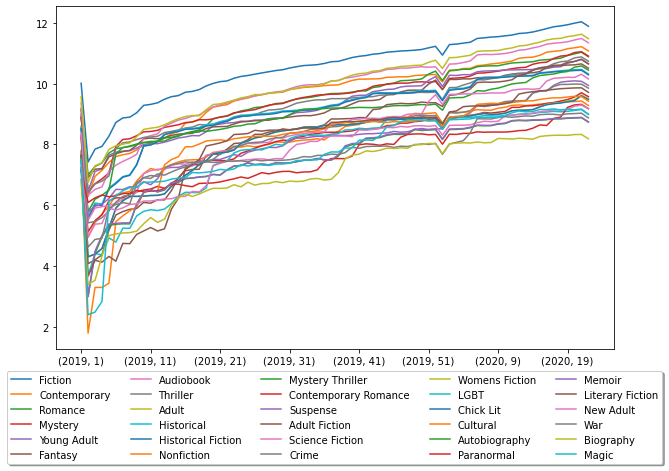

In [231]:
vdf_plotter(vdf_numrevs, form = 'wide', figsize = (10, 7))

## average rating

### genres

In [232]:
#shorten data frame down to relevant variables: dv + genres
dv = ['avg_rating']
tdf = df_revs[dv + genres]
tdf.reset_index(inplace = True)

tdf.head()

,post_date,avg_rating,Literary Fiction,Science Fiction,Contemporary Romance,War,Crime,Historical,Nonfiction,Womens Fiction,Chick Lit,Paranormal,Romance,Fiction,Cultural,Memoir,Young Adult
0,2019-02-28,4.08,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
1,2020-03-05,4.08,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,2020-03-19,4.08,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
3,2020-01-09,4.08,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
4,2019-09-04,4.08,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False


In [233]:
#"melt" the data frame such that you have: post_date + genre + avg_rating in that post_date

#1) Initial melting
##initial melting of genre columns into one "genre"
vdf = pd.melt(tdf.iloc[:100_000], id_vars = ['post_date', 'avg_rating'], value_vars = genres, var_name = "genre")
##filter out the genre values where genre == 'False'
vdf.query("value == True", inplace = True)
##drop the boolean "value" column, it was solely for filtering purposes
vdf.drop('value', axis = 1, inplace = True)

#sort values ascending
vdf.sort_values('post_date', ascending = True, inplace = True)

#summarise duplicate rows, featuring an average average
vdf = pd.pivot_table(\
              data = vdf,
              index = ['post_date', 'genre'],
              values = 'avg_rating',
              aggfunc = np.mean)

vdf.reset_index(inplace = True)

vdf

,post_date,genre,avg_rating
0,2019-01-17,Contemporary Romance,4.080000
1,2019-01-17,Romance,4.080000
2,2019-01-19,Contemporary Romance,4.080000
3,2019-01-19,Romance,4.080000
4,2019-01-21,Contemporary Romance,4.080000
...,...,...,...
4331,2020-05-30,Paranormal,4.240000
4332,2020-05-30,Romance,3.991341
4333,2020-05-30,War,4.121429
4334,2020-05-30,Womens Fiction,3.943333


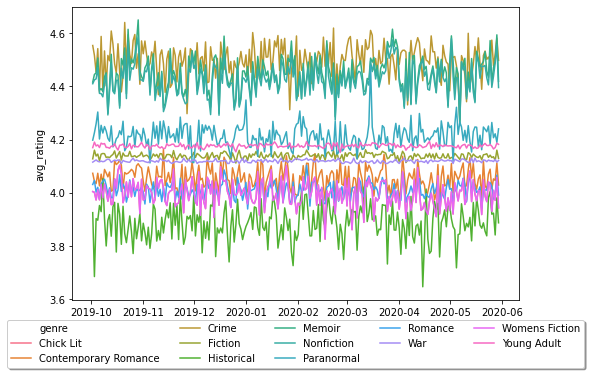

In [236]:
#set an appropriate time filter, since the early months feature a lot of NA's
time_filter = "2019.10.01"
mask = vdf['post_date'] > pd.Timestamp(time_filter)
data = vdf[mask]

#set the plot variables
x = data.post_date
y = data.avg_rating
hue = data.genre

vdf_plotter(data, form = 'long', x = x, y = y, hue = hue)

### authors

In [237]:
#shorten data frame down to relevant variables: dv + genres
vdf = df_revs[['avg_rating', 'author']]
vdf.reset_index(inplace = True)

vdf.head()

,post_date,avg_rating,author
0,2019-02-28,4.08,Krista Ritchie
1,2020-03-05,4.08,Krista Ritchie
2,2020-03-19,4.08,Krista Ritchie
3,2020-01-09,4.08,Krista Ritchie
4,2019-09-04,4.08,Krista Ritchie


In [238]:
n_top = 20
authors = vdf.author.value_counts().iloc[:n_top].index
mask = vdf.author.isin(authors)

vdf = vdf[mask]

In [239]:
#"melt" the data frame such that you have: post_date + genre + avg_rating in that post_date

#sort values ascending
vdf.sort_values('post_date', ascending = True, inplace = True)

#summarise duplicate rows, featuring an average average
vdf = pd.pivot_table(\
              data = vdf,
              index = ['post_date','author'],
              values = 'avg_rating',
              aggfunc = np.mean)

vdf.reset_index(inplace = True)

vdf

,post_date,author,avg_rating
0,2019-01-01,Kristin Hannah,4.120000
1,2019-01-02,Kristin Hannah,4.120000
2,2019-01-03,Kristin Hannah,4.120000
3,2019-01-04,Kristin Hannah,4.120000
4,2019-01-05,Kristin Hannah,4.120000
...,...,...,...
7254,2020-05-30,Ruth Ware,3.945449
7255,2020-05-30,Sally Rooney,3.874769
7256,2020-05-30,Stephen Chbosky,4.178788
7257,2020-05-30,Suzanne Collins,4.240463


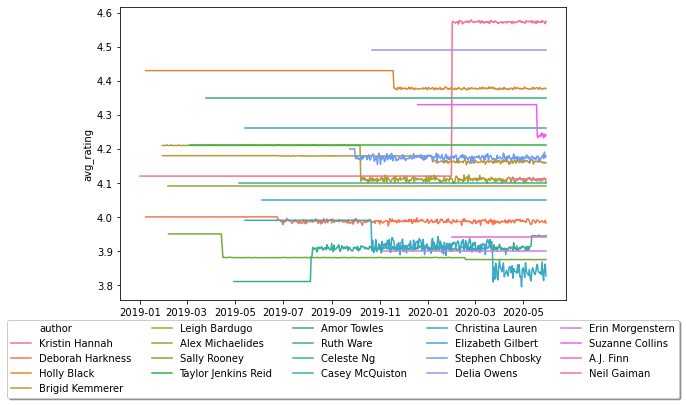

In [240]:
x = vdf.post_date
y = vdf.avg_rating
hue = vdf.author

vdf_plotter(vdf, form = 'long', x = x, y = y, hue = hue)